## Introduction
### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import zscore
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None) 

### Load the data
The dataset contains apartment offers from the 15 largest cities in Poland (Warsaw, Lodz, Krakow, Wroclaw, Poznan, Gdansk, Szczecin, Bydgoszcz, Lublin, Katowice, Bialystok, Czestochowa). The data comes from local websites with apartments for sale. To fully capture the neighborhood of each apartment better, each offer was extended by data from the Open Street Map with distances to points of interest (POI). The data is collected monthly and covers timespan between August 2023 and December 2023

Variables Description:

- city - the name of the city where the property is located
- type - type of the building
- squareMeters - the size of the apartment in square meters
- rooms - number of rooms in the apartment
- floor / floorCount - the floor where the apartment is located and the total number of floors in the building
- buildYear - the year when the building was built
- latitude, longitude - geo coordinate of the property
- centreDistance - distance from the city centre in km
- poiCount - number of points of interest in 500m range from the apartment (schools, clinics, post offices, kindergartens, restaurants, colleges, pharmacies)
- [poiName]Distance - distance to the nearest point of interest (schools, clinics, post offices, kindergartens, restaurants, colleges, pharmacies)
- ownership - the type of property ownership
- condition - the condition of the apartment
- has[features] - whether the property has key features such as assigned parking space, balcony, elevator, security, storage room
- price - offer price in Polish Zloty

https://www.kaggle.com/datasets/krzysztofjamroz/apartment-prices-in-poland/data


In [2]:
df_2023_08 = pd.read_csv('file/apartments_pl_2023_08.csv')
df_2023_08['month'] = 8
#df_2023_08['year'] = 2023
df_2023_09 = pd.read_csv('file/apartments_pl_2023_09.csv')
df_2023_09['month'] = 9
#df_2023_09['year'] = 2023
df_2023_10 = pd.read_csv('file/apartments_pl_2023_10.csv')
df_2023_10['month'] = 10
#df_2023_10['year'] = 2023
df_2023_11 = pd.read_csv('file/apartments_pl_2023_11.csv')
df_2023_11['month'] = 11
#df_2023_11['year'] = 2023
df_2023_12 = pd.read_csv('file/apartments_pl_2023_12.csv')
df_2023_12['month'] = 12
#df_2023_11['year'] = 2023

## Data analize 

In [3]:
df_2023_08.head()

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,poiCount,schoolDistance,clinicDistance,postOfficeDistance,kindergartenDistance,restaurantDistance,collegeDistance,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price,month
0,f8524536d4b09a0c8ccc0197ec9d7bde,szczecin,blockOfFlats,63.00,3.0,4.0,10.0,1980.0,53.378933,14.625296,6.53,9.0,0.118,1.389,0.628,0.105,1.652,NaN,0.413,condominium,concreteSlab,NaN,yes,yes,yes,no,yes,415000,8
1,accbe77d4b360fea9735f138a50608dd,szczecin,blockOfFlats,36.00,2.0,8.0,10.0,NaN,53.442692,14.559690,2.15,16.0,0.273,0.492,0.652,0.291,0.348,1.404,0.205,cooperative,concreteSlab,NaN,no,yes,yes,no,yes,395995,8
2,8373aa373dbc3fe7ca3b7434166b8766,szczecin,tenement,73.02,3.0,2.0,3.0,NaN,53.452222,14.553333,3.24,9.0,0.275,0.672,0.367,0.246,0.300,1.857,0.280,condominium,brick,NaN,no,no,no,no,no,565000,8
3,0a68cd14c44ec5140143ece75d739535,szczecin,tenement,87.60,3.0,2.0,3.0,NaN,53.435100,14.532900,2.27,32.0,0.175,0.259,0.223,0.359,0.101,0.310,0.087,condominium,brick,NaN,yes,yes,no,no,yes,640000,8
4,f66320e153c2441edc0fe293b54c8aeb,szczecin,blockOfFlats,66.00,3.0,1.0,3.0,NaN,53.410278,14.503611,4.07,1.0,0.218,1.690,0.504,0.704,0.501,2.138,0.514,condominium,NaN,NaN,no,no,no,no,no,759000,8


In [4]:
df_2023_09.head()

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,poiCount,schoolDistance,clinicDistance,postOfficeDistance,kindergartenDistance,restaurantDistance,collegeDistance,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price,month
0,71de9eb8a92ac12d7c94315228b70cfb,szczecin,tenement,123.45,4.0,2.0,3.0,NaN,53.432586,14.535685,1.96,46.0,0.138,0.410,0.113,0.367,0.073,0.388,0.321,condominium,brick,NaN,no,yes,no,no,yes,799000,9
1,23d558163bb1c7863c73485048e50858,szczecin,NaN,53.80,2.0,5.0,5.0,NaN,53.429429,14.554642,0.79,60.0,0.147,0.437,0.328,0.198,0.009,0.465,0.073,cooperative,NaN,NaN,no,no,yes,no,no,420000,9
2,3b8819c6c9ffd55adfddfd5bafcc844d,szczecin,tenement,50.00,2.0,NaN,1.0,NaN,53.364400,14.660900,9.32,6.0,0.367,1.368,0.377,0.273,0.367,NaN,0.399,condominium,brick,NaN,yes,no,no,no,no,350000,9
3,708ccd264180315a4cfe6324ed4861d0,szczecin,blockOfFlats,55.19,2.0,1.0,2.0,2013.0,53.480364,14.541494,6.46,2.0,1.570,2.879,1.236,0.803,0.374,3.138,0.183,condominium,brick,premium,yes,yes,no,yes,yes,607000,9
4,8373aa373dbc3fe7ca3b7434166b8766,szczecin,tenement,73.02,3.0,2.0,3.0,NaN,53.452222,14.553333,3.24,9.0,0.275,0.672,0.367,0.246,0.300,1.857,0.280,condominium,brick,NaN,no,no,no,no,no,565000,9


In [5]:
df_2023_10.head()

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,poiCount,schoolDistance,clinicDistance,postOfficeDistance,kindergartenDistance,restaurantDistance,collegeDistance,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price,month
0,23d558163bb1c7863c73485048e50858,szczecin,NaN,53.80,2.0,5.0,5.0,NaN,53.429429,14.554642,0.79,60.0,0.147,0.437,0.328,0.198,0.009,0.465,0.073,cooperative,NaN,NaN,no,no,yes,no,no,420000,10
1,8373aa373dbc3fe7ca3b7434166b8766,szczecin,tenement,73.02,3.0,2.0,3.0,NaN,53.452222,14.553333,3.24,9.0,0.275,0.672,0.367,0.246,0.300,1.857,0.280,condominium,brick,NaN,no,no,no,no,no,565000,10
2,ede1c0d953ff85f3cd9676d39ca8f62d,szczecin,blockOfFlats,37.00,2.0,8.0,10.0,1970.0,53.442692,14.559690,2.15,16.0,0.273,0.492,0.652,0.291,0.348,1.404,0.205,cooperative,concreteSlab,NaN,no,yes,yes,yes,yes,429995,10
3,6c807c6c86a74c57a3fd4445a1f49a46,szczecin,apartmentBuilding,48.00,2.0,4.0,6.0,NaN,53.435461,14.570436,1.48,14.0,0.293,1.009,0.283,0.426,0.176,0.895,0.177,condominium,brick,NaN,no,yes,no,no,no,550000,10
4,bb14c9a540275da73f6cb6ed42e5c26c,szczecin,apartmentBuilding,55.19,2.0,1.0,2.0,2013.0,53.482094,14.542574,6.64,2.0,1.769,2.783,1.394,0.944,0.172,3.209,0.043,condominium,brick,premium,yes,yes,no,yes,yes,607000,10


In [6]:
df_2023_11.head()

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,poiCount,schoolDistance,clinicDistance,postOfficeDistance,kindergartenDistance,restaurantDistance,collegeDistance,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price,month
0,0d9b89891919809b6465f1f8bd942c62,szczecin,blockOfFlats,82.20,4.0,3.0,4.0,1981.0,53.451900,14.560600,3.17,18.0,0.373,0.257,0.252,0.139,0.189,1.684,0.197,condominium,concreteSlab,NaN,yes,no,no,no,yes,669000,11
1,8373aa373dbc3fe7ca3b7434166b8766,szczecin,tenement,73.02,3.0,2.0,3.0,NaN,53.452222,14.553333,3.24,9.0,0.275,0.672,0.367,0.246,0.300,1.857,0.280,condominium,brick,NaN,no,no,no,no,no,650000,11
2,546fbb3c9042fc833149173fc6a2240f,szczecin,blockOfFlats,28.13,1.0,NaN,5.0,1965.0,53.427312,14.549056,0.90,78.0,0.474,0.034,0.138,0.363,0.067,0.436,0.111,condominium,brick,NaN,no,no,no,no,yes,319500,11
3,7d0c31d5409caab173571cce3dcdf702,szczecin,blockOfFlats,68.61,3.0,4.0,4.0,1997.0,53.456213,14.583222,3.94,7.0,0.139,1.336,0.926,0.930,0.071,0.786,0.304,condominium,brick,NaN,no,yes,no,no,yes,550000,11
4,7ec72a2301d950ae17926c3c1e67a0ed,szczecin,tenement,35.92,2.0,NaN,NaN,NaN,53.424203,14.543550,1.16,34.0,0.217,0.374,0.145,0.252,0.201,0.578,0.329,condominium,brick,low,yes,no,no,no,no,299000,11


In [7]:
df_2023_12.head()

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,poiCount,schoolDistance,clinicDistance,postOfficeDistance,kindergartenDistance,restaurantDistance,collegeDistance,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price,month
0,a01d82c9529f98a54d64b9e061c9a73b,szczecin,apartmentBuilding,105.00,4.0,3.0,4.0,2016.0,53.431503,14.485820,5.06,1.0,1.080,0.949,0.623,0.791,1.054,3.062,0.335,condominium,brick,premium,no,yes,yes,no,no,1199999,12
1,d68ea84e5d35da9e282150332bdc22f3,szczecin,blockOfFlats,94.40,4.0,4.0,5.0,NaN,53.441253,14.511030,3.86,7.0,0.439,0.343,0.058,0.532,0.624,1.312,0.051,condominium,brick,premium,yes,yes,no,no,yes,1150000,12
2,420295cc23d693fdffd5ccc9ba35ba98,szczecin,NaN,48.29,2.0,8.0,11.0,2014.0,53.399444,14.526111,3.53,8.0,0.109,1.004,0.153,0.178,0.166,2.296,0.141,condominium,NaN,NaN,yes,yes,yes,no,yes,625000,12
3,7d0c31d5409caab173571cce3dcdf702,szczecin,blockOfFlats,68.61,3.0,4.0,4.0,1997.0,53.456213,14.583222,3.94,7.0,0.139,1.336,0.926,0.930,0.071,0.786,0.304,condominium,brick,NaN,no,yes,no,no,yes,550000,12
4,7ec72a2301d950ae17926c3c1e67a0ed,szczecin,tenement,35.92,2.0,NaN,NaN,NaN,53.424203,14.543550,1.16,34.0,0.217,0.374,0.145,0.252,0.201,0.578,0.329,condominium,brick,low,yes,no,no,no,no,299000,12


### Dividing the data into training and testing parts. The training part is the period from 08/2023 to 10/2023 and the test part is the month of 11/2023

In [8]:
frames = [df_2023_08 ,df_2023_09, df_2023_10,  df_2023_11]
df_train = pd.concat(frames)
df_test = df_2023_12

In [9]:
df_train.shape

(68894, 29)

In [10]:
df_train.dtypes

id                       object
city                     object
type                     object
squareMeters            float64
rooms                   float64
floor                   float64
floorCount              float64
buildYear               float64
latitude                float64
longitude               float64
centreDistance          float64
poiCount                float64
schoolDistance          float64
clinicDistance          float64
postOfficeDistance      float64
kindergartenDistance    float64
restaurantDistance      float64
collegeDistance         float64
pharmacyDistance        float64
ownership                object
buildingMaterial         object
condition                object
hasParkingSpace          object
hasBalcony               object
hasElevator              object
hasSecurity              object
hasStorageRoom           object
price                     int64
month                     int64
dtype: object

In [11]:
df_train.describe()

,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,poiCount,schoolDistance,clinicDistance,postOfficeDistance,kindergartenDistance,restaurantDistance,collegeDistance,pharmacyDistance,price,month
count,68894.000000,68894.000000,56422.000000,67938.000000,56959.000000,68894.000000,68894.000000,68894.000000,68894.000000,68825.000000,68575.000000,68799.000000,68826.000000,68701.000000,66873.000000,68787.000000,6.889400e+04,68894.000000
mean,58.944435,2.685212,3.305431,5.221172,1984.586527,52.045462,19.501237,4.342607,20.337460,0.416781,0.983966,0.523196,0.376271,0.357266,1.449895,0.366447,7.151848e+05,9.441098
std,21.279593,0.911641,2.506487,3.270862,34.058699,1.339131,1.781489,2.873857,23.816947,0.479851,0.905907,0.513988,0.463293,0.484109,1.106158,0.478425,3.515693e+05,1.126327
min,25.000000,1.000000,1.000000,1.000000,1850.000000,49.978999,14.447127,0.020000,0.000000,0.004000,0.001000,0.001000,0.002000,0.001000,0.006000,0.001000,1.500000e+05,8.000000
25%,44.492500,2.000000,2.000000,3.000000,1965.000000,51.114026,18.523780,1.990000,7.000000,0.175000,0.359000,0.239000,0.158000,0.117000,0.584000,0.145000,4.700000e+05,8.000000
50%,55.000000,3.000000,3.000000,4.000000,1991.000000,52.195312,19.899315,3.940000,13.000000,0.290000,0.681000,0.392000,0.266000,0.234000,1.121000,0.241000,6.490000e+05,9.000000
75%,69.000000,3.000000,4.000000,6.000000,2014.000000,52.440563,20.994734,6.120000,24.000000,0.468000,1.255000,0.628000,0.421000,0.416000,2.070000,0.407000,8.600000e+05,10.000000
max,150.000000,6.000000,29.000000,29.000000,2023.000000,54.606460,23.207128,16.940000,208.000000,4.818000,4.998000,4.968000,4.960000,4.985000,5.000000,4.992000,2.500000e+06,11.000000


In [12]:
# Checking for missing values
df_train.isna().sum()

id                          0
city                        0
type                    15278
squareMeters                0
rooms                       0
floor                   12472
floorCount                956
buildYear               11935
latitude                    0
longitude                   0
centreDistance              0
poiCount                    0
schoolDistance             69
clinicDistance            319
postOfficeDistance         95
kindergartenDistance       68
restaurantDistance        193
collegeDistance          2021
pharmacyDistance          107
ownership                   0
buildingMaterial        26791
condition               51924
hasParkingSpace             0
hasBalcony                  0
hasElevator              3545
hasSecurity                 0
hasStorageRoom              0
price                       0
month                       0
dtype: int64

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68894 entries, 0 to 16301
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    68894 non-null  object 
 1   city                  68894 non-null  object 
 2   type                  53616 non-null  object 
 3   squareMeters          68894 non-null  float64
 4   rooms                 68894 non-null  float64
 5   floor                 56422 non-null  float64
 6   floorCount            67938 non-null  float64
 7   buildYear             56959 non-null  float64
 8   latitude              68894 non-null  float64
 9   longitude             68894 non-null  float64
 10  centreDistance        68894 non-null  float64
 11  poiCount              68894 non-null  float64
 12  schoolDistance        68825 non-null  float64
 13  clinicDistance        68575 non-null  float64
 14  postOfficeDistance    68799 non-null  float64
 15  kindergartenDistanc

In [14]:
nulls_summary = pd.DataFrame(df_train.isnull().any(), columns=['Nulls'])
nulls_summary['Num_of_nulls [qty]'] = pd.DataFrame(df_train.isnull().sum())
nulls_summary['Num_of_nulls [%]'] = round((df_train.isnull().mean()*100),2)
print(nulls_summary.sort_values(by=['Num_of_nulls [%]'], ascending=False))

                      Nulls  Num_of_nulls [qty]  Num_of_nulls [%]
condition              True               51924             75.37
buildingMaterial       True               26791             38.89
type                   True               15278             22.18
floor                  True               12472             18.10
buildYear              True               11935             17.32
hasElevator            True                3545              5.15
collegeDistance        True                2021              2.93
floorCount             True                 956              1.39
clinicDistance         True                 319              0.46
restaurantDistance     True                 193              0.28
pharmacyDistance       True                 107              0.16
postOfficeDistance     True                  95              0.14
schoolDistance         True                  69              0.10
kindergartenDistance   True                  68              0.10
hasParking

### Data Visualization

In [15]:
def percent_formatter(x, pos):
        return str(round(x*100)) + "%"
    
def my_gap_analysis(df_train):
    allCols = df_train.columns
    nonEmpty = []
    barColors = []
    for colName in allCols:
      completeness = 1-len(df_train[df_train[colName].isnull()])/len(df_train)
      nonEmpty.append(completeness)
      if(completeness == 1):
         barColors.append('green')
      elif completeness < 0.75:
        barColors.append('red')
      else:
         barColors.append('yellow')

    fig, axs = plt.subplots(figsize=(10, 7))
    axs.set_title("Data completeness [%]")
    axs.barh(allCols, nonEmpty, color=barColors)
    axs.set_xlim(0, 1)
    axs.xaxis.set_major_formatter(percent_formatter)
    plt.show()
    return

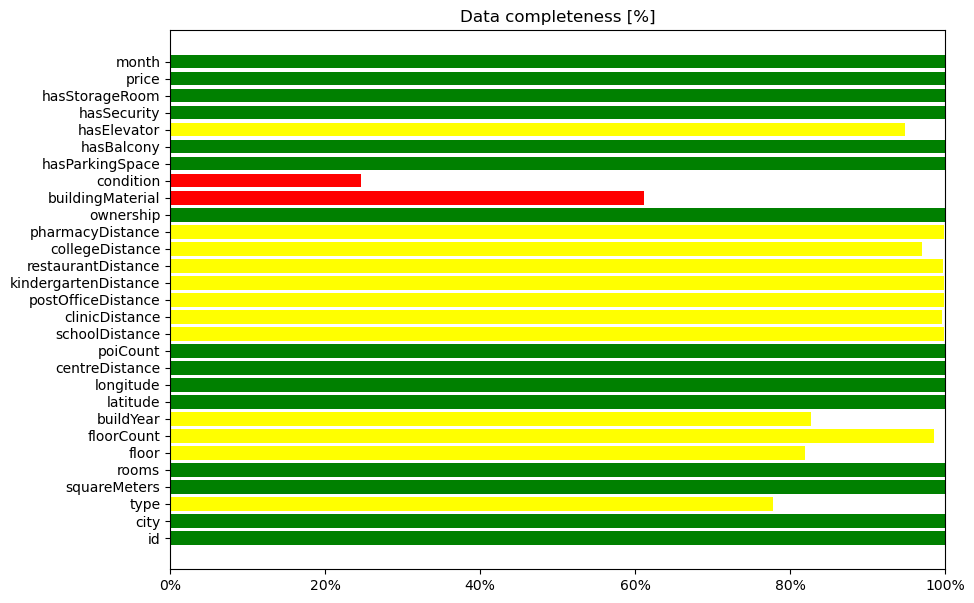

In [16]:
my_gap_analysis(df_train)

In [17]:

df_type = df_train["city"].value_counts(dropna=False)
print(df_type)


warszawa       20256
krakow          9883
gdansk          6888
wroclaw         6612
lodz            5559
bydgoszcz       3677
gdynia          3000
poznan          2818
lublin          2318
szczecin        2049
katowice        1940
radom           1282
bialystok       1065
czestochowa      820
rzeszow          727
Name: city, dtype: int64


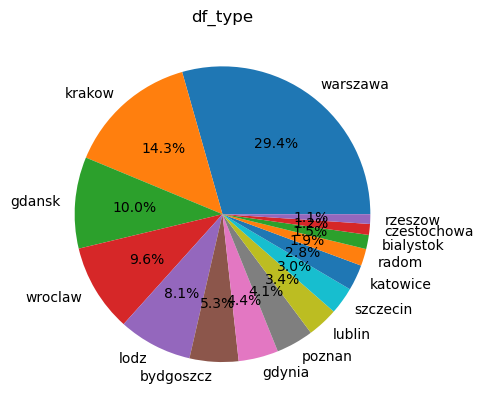

In [18]:
figure, axe = plt.subplots()
axe.set_title('df_type')
axe.pie(df_type,labels = df_type.index, autopct='%1.1f%%')
plt.show()

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
def my_correlation_analysis(df_train):
    plt.figure(figsize=(14,8))
    sns.set_theme(style="white")
    corr = df_train.corr()
    heatmap = sns.heatmap(corr, annot=True, cmap="RdBu", fmt='.1g')
    return


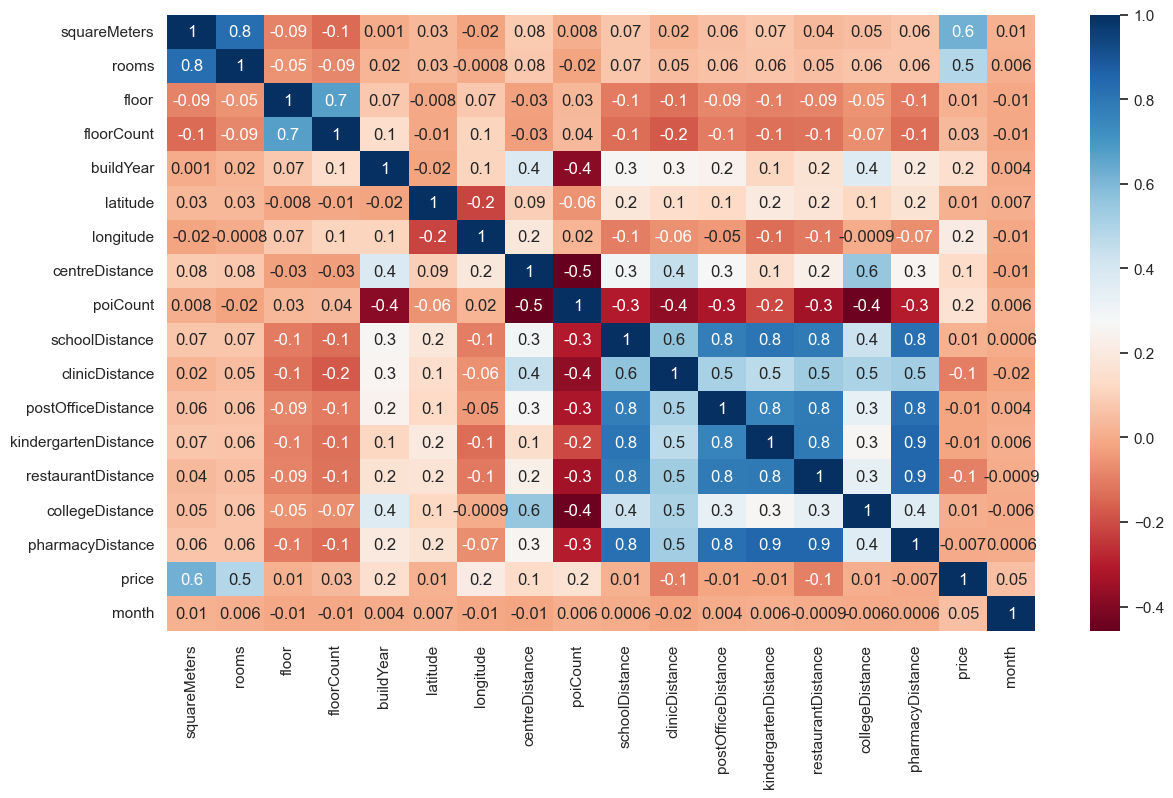

In [20]:
my_correlation_analysis(df_train)

In [21]:
df_train.corr()

,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,poiCount,schoolDistance,clinicDistance,postOfficeDistance,kindergartenDistance,restaurantDistance,collegeDistance,pharmacyDistance,price,month
squareMeters,1.000000,0.825974,-0.090633,-0.141445,0.001060,0.029579,-0.021166,0.080498,0.007924,0.072231,0.023308,0.055411,0.070594,0.038139,0.048539,0.063062,0.622552,0.012668
rooms,0.825974,1.000000,-0.052947,-0.086622,0.021486,0.027630,-0.000806,0.076920,-0.021636,0.071847,0.046055,0.056998,0.064562,0.053807,0.061412,0.064566,0.486429,0.005967
floor,-0.090633,-0.052947,1.000000,0.671800,0.073032,-0.008453,0.073246,-0.026776,0.029339,-0.106293,-0.128128,-0.085759,-0.095424,-0.092365,-0.054699,-0.105746,0.011631,-0.010696
floorCount,-0.141445,-0.086622,0.671800,1.000000,0.138442,-0.011355,0.108976,-0.034043,0.036082,-0.133580,-0.174389,-0.108940,-0.130896,-0.126545,-0.068906,-0.134973,0.034613,-0.011446
buildYear,0.001060,0.021486,0.073032,0.138442,1.000000,-0.018588,0.112007,0.377693,-0.388310,0.260507,0.256222,0.238544,0.115654,0.166521,0.366911,0.198415,0.151529,0.003857
latitude,0.029579,0.027630,-0.008453,-0.011355,-0.018588,1.000000,-0.222065,0.093526,-0.058118,0.180752,0.140763,0.124341,0.202560,0.173930,0.118526,0.166510,0.011982,0.006567
longitude,-0.021166,-0.000806,0.073246,0.108976,0.112007,-0.222065,1.000000,0.188637,0.024387,-0.098371,-0.062766,-0.046313,-0.137153,-0.110331,-0.000871,-0.065459,0.211884,-0.011495
centreDistance,0.080498,0.076920,-0.026776,-0.034043,0.377693,0.093526,0.188637,1.000000,-0.456606,0.291705,0.443968,0.268239,0.145795,0.228797,0.551267,0.259751,0.131620,-0.013819
poiCount,0.007924,-0.021636,0.029339,0.036082,-0.388310,-0.058118,0.024387,-0.456606,1.000000,-0.305432,-0.375073,-0.323510,-0.211734,-0.342050,-0.442327,-0.301136,0.162226,0.006015
schoolDistance,0.072231,0.071847,-0.106293,-0.133580,0.260507,0.180752,-0.098371,0.291705,-0.305432,1.000000,0.563416,0.774170,0.805370,0.786419,0.428616,0.820968,0.014947,0.000630


## Data clearing


### Drop duplicates and reset index


In [22]:
df_train = df_train.drop_duplicates().reset_index(drop=True)

### Filling in missing data

The data guessing strategy involves filling in missing data with predictions using available information. In cases where predicting missing cells involved significant risk, the column was omitted. The decision to remove a column was made independently depending on which option retained more data, ensuring a comprehensive dataset.

In [23]:
np.random.seed(2000)

#### Filling in the gaps in the columns Distance in the base with the 'centreDistance' column


In [24]:
#loop data:
def partial(lst, query):
    return list(filter(lambda x: query in x, lst))

In [25]:
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
## selecting columns with the name distance
#list_dist = partial(df_train.columns.values, 'Distance')
## selected column to fill in the blanks 'centreDistance'
#sort_by_value = 'centreDistance'
## when 'centreDistance' use .remove(sort_by_value)
#work_list_dist=list_dist.remove(sort_by_value) 

## for main edition of processed databases 0 - downloads data from df, 1 - processes already processed data
#full_df_finish = 0 

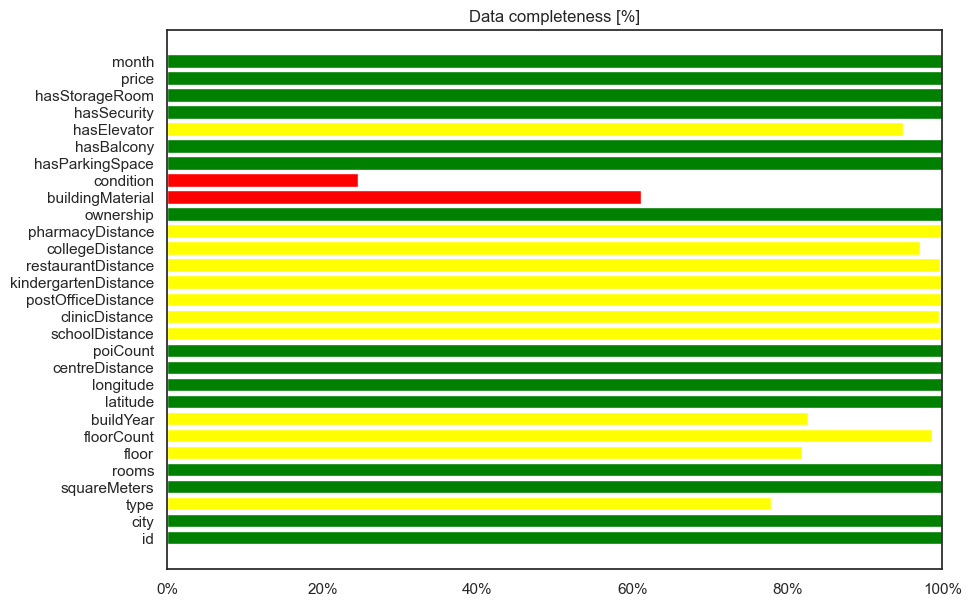

In [26]:
my_gap_analysis(df_train)

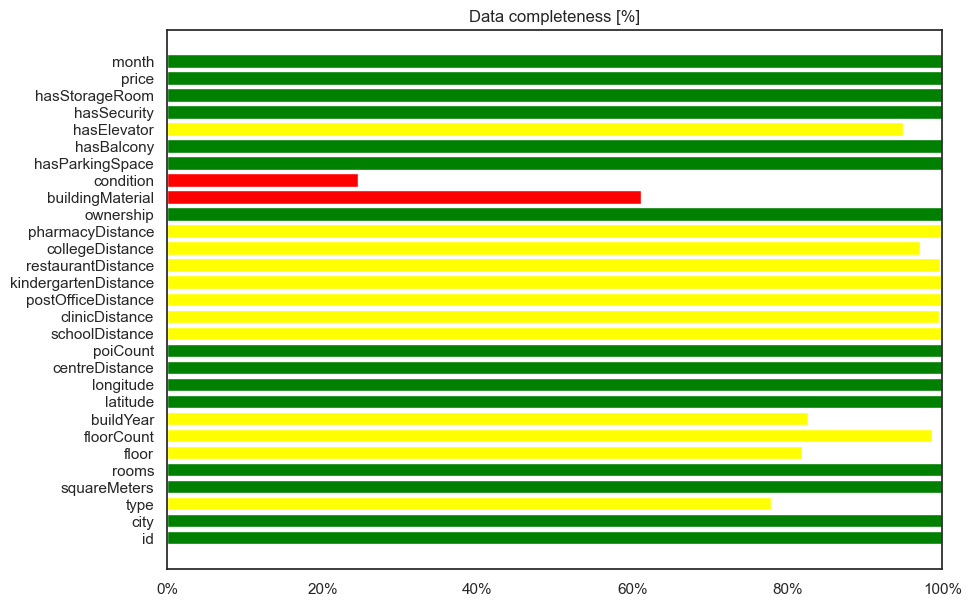

In [27]:
my_gap_analysis(df_train)

In [28]:
#!!!!!!!!!do wykasowania
import pandas as pd

# Przykładowe dane
data = {'Kolumna1': [1, 2, None, 4, 5],
        'Kolumna2': ['A', 'B', 'C', None, 'E'],
        'Kolumna3': [10, 20, 30, 40, 50]}

# Tworzenie DataFrame
df = pd.DataFrame(data)

# Wydruk ramki danych przed usunięciem wartości NaN
print("Przed usunięciem:")
print(df)

# Usuwanie wierszy z wartościami NaN w wybranych kolumnach
kolumny_do_sprawdzenia = ['Kolumna2']
df = df.dropna(subset=kolumny_do_sprawdzenia)

# Wydruk ramki danych po usunięciu wartości NaN
print("\nPo usunięciu:")
print(df)


Przed usunięciem:
   Kolumna1 Kolumna2  Kolumna3
0       1.0        A        10
1       2.0        B        20
2       NaN        C        30
3       4.0     None        40
4       5.0        E        50

Po usunięciu:
   Kolumna1 Kolumna2  Kolumna3
0       1.0        A        10
1       2.0        B        20
2       NaN        C        30
4       5.0        E        50


In [29]:
def FillingTheGapsOther (full_df):


    # remove low conditions apartments. focus on mainstream
    #!!!!!!!full_df = full_df[full_df['condition'] != 'low']

    # remove cooperative since it is uncommon
    #!!!!!!!full_df = full_df[full_df['ownership'] != 'cooperative']

    # tenements were built between 1875 and 1975
    full_df['buildYear'] = full_df.apply(lambda x: round(np.random.normal(loc=1925, scale=25)) if (pd.isna(x['buildYear']) and  x['type'] == 'tenement') else x['buildYear'], axis=1)
    # apartments were build after 2000
    full_df['buildYear'] = full_df.apply(lambda x: (2023 - round(abs(np.random.normal(loc=0, scale=15)))) if (pd.isna(x['buildYear']) and  x['type'] == 'apartmentBuilding') else x['buildYear'], axis=1)
    # tenement has been built before 1960
    full_df['type'] = full_df.apply(lambda x: 'tenement' if (pd.isna(x['type']) and  x['buildYear'] < 1960) else x['type'], axis=1)
    # block of flats has been built between 1960 and 2000
    full_df['type'] = full_df.apply(lambda x: 'blockOfFlats' if (pd.isna(x['type']) and  x['buildYear'] < 2000) else x['type'], axis=1)
    # cooperative apartments are usually block of flats
    full_df['type'] = full_df.apply(lambda x: 'blockOfFlats' if (pd.isna(x['type']) and  x['ownership'] == 'cooperative') else x['type'], axis=1)
    # after 2000 a mix of block of flats and apartment buildings has been built
    full_df['type'] = full_df.apply(lambda x: ('blockOfFlats' if(np.random.randint(0, 2) == 0) else 'apartmentBuilding') if (pd.isna(x['type'])) else x['type'], axis=1)
    # between 1960 and 1980 concrete slabs were used often. otherwise it was brick
    full_df['buildingMaterial'] = full_df.apply(lambda x: 'concreteSlab' if (pd.isna(x['buildingMaterial']) and x['buildYear'] >= 1960 and x['buildYear'] <= 1980) else x['buildingMaterial'], axis=1)
    full_df['buildingMaterial'] = full_df.apply(lambda x: 'brick' if pd.isna(x['buildingMaterial']) else x['buildingMaterial'], axis=1)
    # most popular buildings are 4 floors height
    full_df['floorCount'] = full_df.apply(lambda x: max(x['floor'], 4) if pd.isna(x['floorCount']) else x['floorCount'], axis=1)
    full_df['floorCount'] = full_df.apply(lambda x: 4 if pd.isna(x['floorCount']) else x['floorCount'], axis=1)
    # apartments are equally distributed across all floors
    full_df['floor'] = full_df.apply(lambda x: np.random.randint(1, x['floorCount']+1) if pd.isna(x['floor']) else x['floor'], axis=1)
    # usually elevator is installed in 4+ floor buildings
    full_df['hasElevator'] = full_df.apply(lambda x: 'no' if (pd.isna(x['hasElevator']) and x['floorCount'] <= 4) else x['hasElevator'], axis=1)
    full_df['hasElevator'] = full_df.apply(lambda x: 'yes' if (pd.isna(x['hasElevator']) and x['floorCount'] > 4) else x['hasElevator'], axis=1)
    
    # drop irrelevant columns
    # !!!!!!!!!!!!!!!!!!!poprawka moja 
    full_df = full_df.drop(['condition'], axis=1)
    #full_df = full_df.drop(['condition', 'longitude', 'latitude', 'ownership'], axis=1)

    #for col in full_df.columns:
        #full_df = full_df[full_df[col].isnull() == False]

    return full_df

In [30]:
full_df = FillingTheGapsOther (df_train)
df_test = FillingTheGapsOther (df_test)

In [31]:
#!!!!!!!!! do wykonania baza na podstawie której będą uzupełniane dystance
##df_train - usunąć dystance

#list of parameters for the function: selecting columns with the name distance and add buildYear
list_parameters = partial(full_df.columns.values, 'Distance')
list_parameters.append('buildYear')
#the database from which we will draw data for the FillingTheGapsDistance function
all_replenishment_df = df_train.dropna(subset=list_parameters).copy(deep=False)


#!!!!!!!!!!!!!!!! poprawione zgodnie z wytycznymi
# Rows with NaN Values
#list_NAN = df_test_OK.columns[df_test_OK.isna().any()].tolist()

#!!!!!!!!!!!!!!!! poprawione zgodnie z wytycznymi
# Pandas Drop Rows with NaN Values in DataFrame
#df_test_OK = df_test_OK.dropna(subset=list_NAN).reset_index(drop=True)


def FillingTheGapsDistance (df_train, all_replenishment_df, list_parameters):
    # selecting columns to change
    list_dist = list_parameters.copy()
    # selected column to fill in the blanks 'centreDistance'
    sort_by_value = 'centreDistance'
    # when 'centreDistance' use .remove(sort_by_value)
    work_list_dist=list_dist.remove(sort_by_value) 

    # for main edition of processed databases 0 - downloads data from df, 1 - processes already processed data
    full_df_finish = 0 
    #complete individual columns
    for column_being_completed in list_dist:
    
        #Making a working set
    
        if (full_df_finish == 0):
             # set not completed
            #!!!!!!!!!!!!!!bład do naprawienia!!!!!!!!!!!!
            not_working_df = df_train.dropna(subset=list_dist).copy(deep=False)
            # working set for repair
            working_df = df_train.drop(not_working_df.index)
            full_df_finish = 1
        else:
            # set not completed
            not_working_df = full_df.dropna(subset=list_dist).copy(deep=False)
            # working set for repair
            working_df = full_df.drop(not_working_df.index)
              
             
    
        #segregation by city names
        sort_working_df = working_df.sort_values(by=['city'])
        # selecting indexes by city names
        index_sort_working_df = sort_working_df['centreDistance'].index
    
        #I choose a city from the database where there are deficiencies
        #loop data:
        search_city = 'zero'
        name_column_to_part = 'city'
        # empty database for summarizing fragments
        new_working_df = pd.DataFrame(columns=[working_df.columns]) 
        # indicates whether the database is empty (1 - is empty, 0 is not empty)
        empty_new_working_df = 1  

        # loop to divide by city names
        for one_index_sort_working_df in index_sort_working_df:
            if (search_city != working_df[name_column_to_part][one_index_sort_working_df]):
                # here there is a division by city names
                search_city = working_df[name_column_to_part][one_index_sort_working_df] 
                # here there is a division by the names of the base cities:
                # finding the appropriate part of the database to fill in the gaps
                #!!!!!!!!!!!!!!!!!!!!!!!!!!!poprawka
                base_for_replenishment_df = all_replenishment_df[all_replenishment_df[name_column_to_part] == search_city].copy() 
                # calling the database with the city name
                city_work_df1 = working_df[working_df[name_column_to_part]== search_city].copy() 
                #removing columns (what columns to remove)
                # defining an empty list to remove columns
                drop_column = [] 
                # columns to remain after deletion
                nan_in_column = [sort_by_value, column_being_completed]
                for name_column in city_work_df1.columns:
                    # columns to remain after deletion
                    if ((name_column != nan_in_column[0]) and (name_column != nan_in_column[1]) ): 
                        drop_column.append(name_column)
                #remove unnecessary columns
            
                # base to complete and sorting values from smallest to largest
                df_write = city_work_df1.sort_values(nan_in_column[0])
                #removing unnecessary columns and reorganizing columns
                df_reindex_write = df_write.drop(columns=drop_column).reindex(columns=nan_in_column) 
                # database from which we will complete and sort the values from the smallest to the largest
                df_read = base_for_replenishment_df.sort_values(nan_in_column[0]) 
                #removing unnecessary columns and reorganizing columns
                df_reindex_read = df_read.drop(columns=drop_column).reindex(columns=nan_in_column)
                # combining columns and finding the distance
                search_column_values = pd.merge_asof(
                    df_reindex_write,
                    df_reindex_read,
                    on=nan_in_column[0],
                    direction="nearest" ) 
                
                # preparing data for merging:
                # name of the searched column to merge it
                index_search_column_values = [nan_in_column[1]+'_y'] 
                one_column = search_column_values[index_search_column_values].rename(columns={index_search_column_values[0]: nan_in_column[1]})
                # reset the index and rewrite it to the column and remove the column (being replaced)
                df_write_index = df_write.reset_index().drop(nan_in_column[1], axis=1) 
                #removing the column and inserting the filled one
                df_robocze = pd.merge(df_write_index, one_column, left_index=True, right_index=True)

                #database summing
                if (empty_new_working_df == 1):
                    # copy of the database when it is empty
                    new_working_df = df_robocze.copy() 
                    empty_new_working_df = 0
                else:
                    # attaching a base to a second base
                    new_working_df = pd.concat([new_working_df, df_robocze]) 
                
        # combining the database being completed and the database used for completion into a whole
        to_merge_new_working_df = new_working_df.drop(columns=new_working_df.columns[0]).reindex(columns=not_working_df.columns) # usunięcie kolumny z indeksem
        full_df = pd.concat([not_working_df, to_merge_new_working_df]).reset_index(drop=True)

    return full_df

In [32]:
full_df = FillingTheGapsDistance (full_df, all_replenishment_df, list_parameters)
df_test = FillingTheGapsDistance (df_test, all_replenishment_df, list_parameters)

In [33]:
#!!!!!!!!!!!!!!!! do  przebadania temat (może typ i cene brać pod uwagę?? lub dystance)

full_df[full_df['buildYear'].isnull()]

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,poiCount,schoolDistance,clinicDistance,postOfficeDistance,kindergartenDistance,restaurantDistance,collegeDistance,pharmacyDistance,ownership,buildingMaterial,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price,month


In [34]:
#!!!!!!!! do usunięcia
print(len(df_test))
print ('------------------')
print(len(df_2023_12))
print ('------------------')
print(df_test.isna().sum())
print ('------------------')
print(full_df.isna().sum())

16483
------------------
16483
------------------
id                      0
city                    0
type                    0
squareMeters            0
rooms                   0
floor                   0
floorCount              0
buildYear               0
latitude                0
longitude               0
centreDistance          0
poiCount                0
schoolDistance          0
clinicDistance          0
postOfficeDistance      0
kindergartenDistance    0
restaurantDistance      0
collegeDistance         0
pharmacyDistance        0
ownership               0
buildingMaterial        0
hasParkingSpace         0
hasBalcony              0
hasElevator             0
hasSecurity             0
hasStorageRoom          0
price                   0
month                   0
dtype: int64
------------------
id                      0
city                    0
type                    0
squareMeters            0
rooms                   0
floor                   0
floorCount              0
buildYea

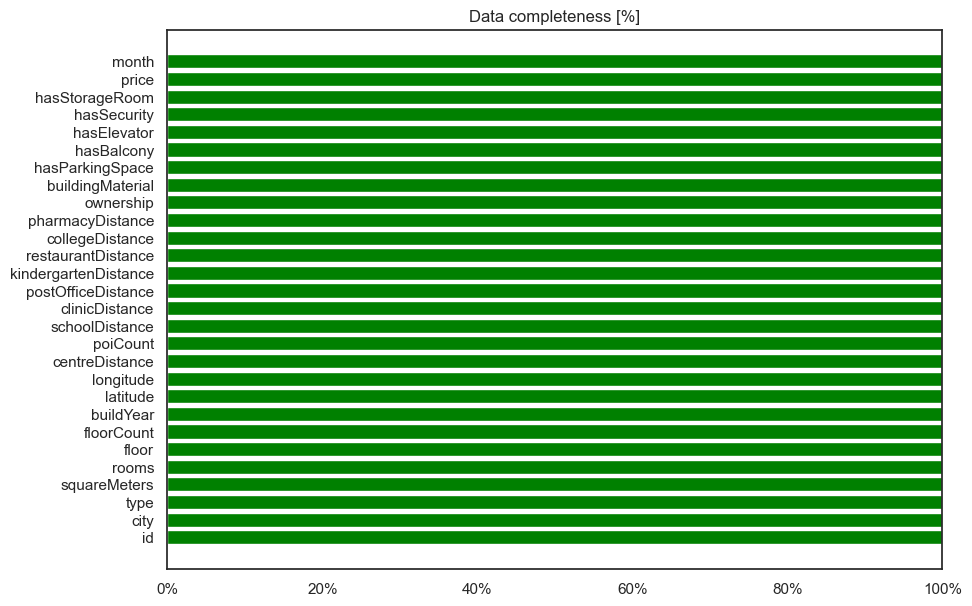

In [35]:
my_gap_analysis(full_df)

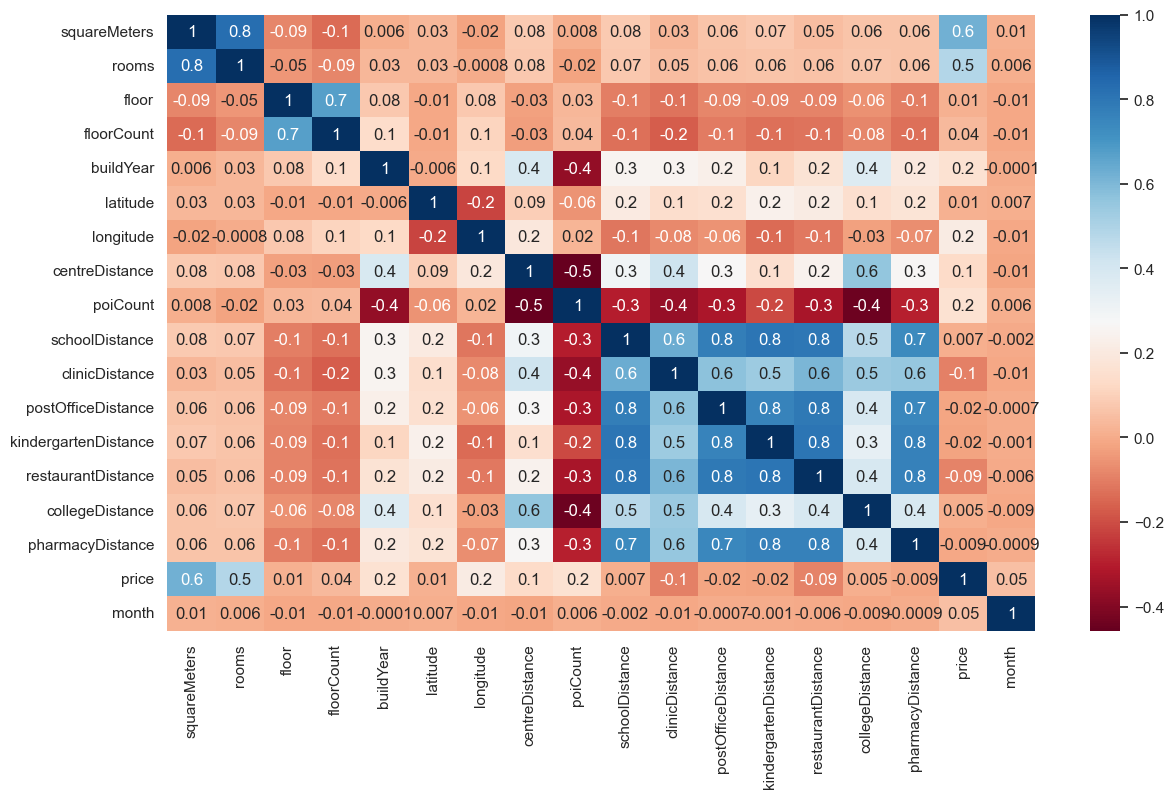

In [36]:
my_correlation_analysis(full_df)

### Unnecessary columns, remove id column

In [37]:
full_df.drop(columns=["id"], inplace=True)

In [38]:
full_df.head()

,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,poiCount,schoolDistance,clinicDistance,postOfficeDistance,kindergartenDistance,restaurantDistance,collegeDistance,pharmacyDistance,ownership,buildingMaterial,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price,month
0,szczecin,tenement,73.02,3.0,2.0,3.0,1968.0,53.452222,14.553333,3.24,9.0,0.275,0.672,0.367,0.246,0.300,1.857,0.280,condominium,brick,no,no,no,no,no,565000,8
1,szczecin,tenement,87.60,3.0,2.0,3.0,1972.0,53.435100,14.532900,2.27,32.0,0.175,0.259,0.223,0.359,0.101,0.310,0.087,condominium,brick,yes,yes,no,no,yes,640000,8
2,szczecin,blockOfFlats,63.30,3.0,2.0,4.0,1997.0,53.463100,14.572800,4.48,10.0,0.079,1.224,0.737,0.260,1.102,0.377,0.745,cooperative,concreteSlab,yes,yes,no,no,yes,499000,8
3,szczecin,blockOfFlats,47.45,2.0,2.0,10.0,1974.0,53.450232,14.562625,2.99,18.0,0.327,0.378,0.234,0.262,0.244,1.736,0.277,condominium,concreteSlab,no,no,yes,no,yes,370000,8
4,szczecin,apartmentBuilding,60.08,2.0,3.0,4.0,2009.0,53.454685,14.551520,3.53,8.0,0.572,0.784,0.305,0.435,0.257,1.945,0.155,condominium,brick,no,yes,yes,no,no,629000,8


### Locate categorical variables, we can assume that categorical columns are those in which the number of unique values  is not more than 10. Among them, find those that have a gini coefficient greater than 0.6 and remove them from the set. (Gini index)

In [39]:
def gini(array):
    array = np.array(array).flatten()
    if np.amin(array) < 0:
        array -= np.amin(array)
    array = array + 0.0000001
    array = np.sort(array)
    index = np.arange(1,array.shape[0]+1)
    n = array.shape[0]
    return ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array)))

In [40]:
cat_columns = [col for col in full_df.columns if full_df[col].nunique() < 11]
high_gini_cat_columns = [col for col in cat_columns if gini(full_df[col].value_counts().values) > 0.6]
full_df.drop(columns=high_gini_cat_columns, inplace=True)

### Remove numeric columns for which the absolute value of correlation with the target is less than 0.1

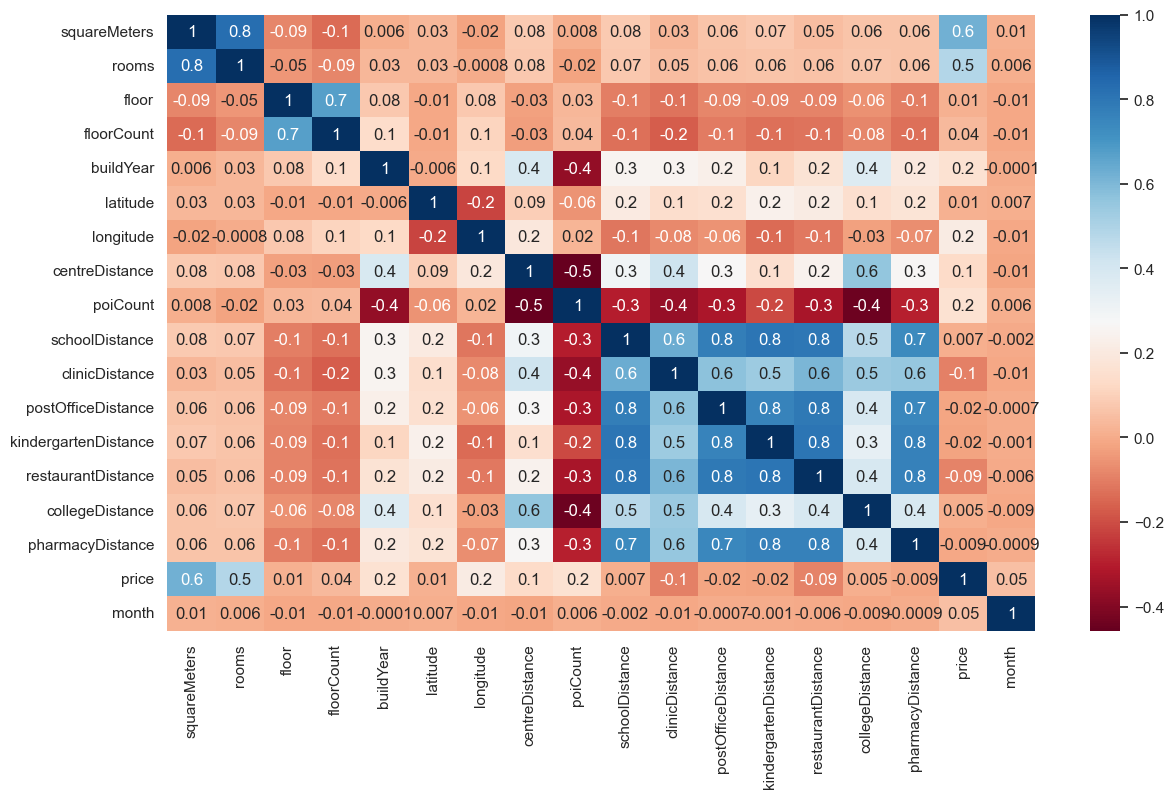

In [41]:
my_correlation_analysis(full_df)

In [42]:
columns_to_drop = (c:= np.abs(full_df.corr()["price"]).sort_values(ascending=False))[c < 0.10].index

In [43]:
full_df.drop(columns=columns_to_drop, inplace=True)

In [44]:
full_df.isna().sum()

city                0
type                0
squareMeters        0
rooms               0
buildYear           0
longitude           0
centreDistance      0
poiCount            0
ownership           0
buildingMaterial    0
hasParkingSpace     0
hasBalcony          0
hasElevator         0
hasSecurity         0
hasStorageRoom      0
price               0
dtype: int64

### Remove outliers using z-score criteria

In [45]:
zscore_df = np.abs(full_df.select_dtypes([int, float]).apply(zscore))
z = zscore_df.apply(lambda x: x < 3)
zsum = z.sum(axis=1)
full_df = full_df[zsum == len(z.columns)]


In [46]:
full_df.head()

,city,type,squareMeters,rooms,buildYear,longitude,centreDistance,poiCount,ownership,buildingMaterial,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
0,szczecin,tenement,73.02,3.0,1968.0,14.553333,3.24,9.0,condominium,brick,no,no,no,no,no,565000
1,szczecin,tenement,87.60,3.0,1972.0,14.532900,2.27,32.0,condominium,brick,yes,yes,no,no,yes,640000
2,szczecin,blockOfFlats,63.30,3.0,1997.0,14.572800,4.48,10.0,cooperative,concreteSlab,yes,yes,no,no,yes,499000
3,szczecin,blockOfFlats,47.45,2.0,1974.0,14.562625,2.99,18.0,condominium,concreteSlab,no,no,yes,no,yes,370000
4,szczecin,apartmentBuilding,60.08,2.0,2009.0,14.551520,3.53,8.0,condominium,brick,no,yes,yes,no,no,629000


In [47]:
#Wybieranie takich samych kolumn jak dane główne
df_test_OK = df_test[full_df.columns]

In [48]:
#!!!!!!!!!!!!!!!! poprawione zgodnie z wytycznymi
# Rows with NaN Values
#list_NAN = df_test_OK.columns[df_test_OK.isna().any()].tolist()

#!!!!!!!!!!!!!!!! poprawione zgodnie z wytycznymi
# Pandas Drop Rows with NaN Values in DataFrame
#df_test_OK = df_test_OK.dropna(subset=list_NAN).reset_index(drop=True)

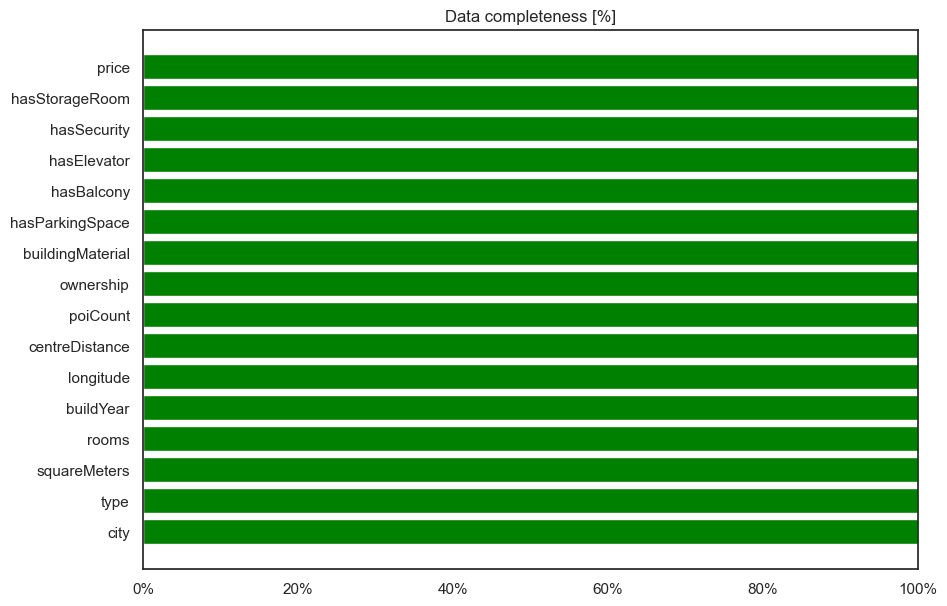

In [49]:
# analysis gap
my_gap_analysis(df_test_OK)

In [50]:
df_test_OK.head()

,city,type,squareMeters,rooms,buildYear,longitude,centreDistance,poiCount,ownership,buildingMaterial,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
0,szczecin,apartmentBuilding,105.00,4.0,2016.0,14.485820,5.06,1.0,condominium,brick,no,yes,yes,no,no,1199999
1,szczecin,blockOfFlats,48.29,2.0,2014.0,14.526111,3.53,8.0,condominium,brick,yes,yes,yes,no,yes,625000
2,szczecin,blockOfFlats,68.61,3.0,1997.0,14.583222,3.94,7.0,condominium,brick,no,yes,no,no,yes,550000
3,szczecin,tenement,35.92,2.0,1899.0,14.543550,1.16,34.0,condominium,brick,yes,no,no,no,no,299000
4,szczecin,blockOfFlats,81.00,4.0,1989.0,14.529444,4.01,9.0,cooperative,brick,yes,no,no,no,yes,729000


In [51]:
full_df.head()

,city,type,squareMeters,rooms,buildYear,longitude,centreDistance,poiCount,ownership,buildingMaterial,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
0,szczecin,tenement,73.02,3.0,1968.0,14.553333,3.24,9.0,condominium,brick,no,no,no,no,no,565000
1,szczecin,tenement,87.60,3.0,1972.0,14.532900,2.27,32.0,condominium,brick,yes,yes,no,no,yes,640000
2,szczecin,blockOfFlats,63.30,3.0,1997.0,14.572800,4.48,10.0,cooperative,concreteSlab,yes,yes,no,no,yes,499000
3,szczecin,blockOfFlats,47.45,2.0,1974.0,14.562625,2.99,18.0,condominium,concreteSlab,no,no,yes,no,yes,370000
4,szczecin,apartmentBuilding,60.08,2.0,2009.0,14.551520,3.53,8.0,condominium,brick,no,yes,yes,no,no,629000


In [52]:
##Selecting object columns
column_list_df_test =  df_test_OK.select_dtypes("object").columns
print('column_list_df_test: ', column_list_df_test)
column_list_full_df =  full_df.select_dtypes("object").columns
print('column_list_full_df: ', column_list_full_df)

column_list_df_test:  Index(['city', 'type', 'ownership', 'buildingMaterial', 'hasParkingSpace',
       'hasBalcony', 'hasElevator', 'hasSecurity', 'hasStorageRoom'],
      dtype='object')
column_list_full_df:  Index(['city', 'type', 'ownership', 'buildingMaterial', 'hasParkingSpace',
       'hasBalcony', 'hasElevator', 'hasSecurity', 'hasStorageRoom'],
      dtype='object')


In [53]:
#
label_encoder = LabelEncoder()

In [54]:
full_df['city'].unique()

array(['szczecin', 'gdynia', 'krakow', 'poznan', 'bialystok', 'gdansk',
       'wroclaw', 'radom', 'rzeszow', 'lodz', 'katowice', 'lublin',
       'czestochowa', 'warszawa', 'bydgoszcz'], dtype=object)

In [55]:
df_test_OK['city'].unique()

array(['szczecin', 'gdynia', 'krakow', 'poznan', 'bialystok', 'gdansk',
       'wroclaw', 'radom', 'rzeszow', 'lodz', 'katowice', 'lublin',
       'czestochowa', 'warszawa', 'bydgoszcz'], dtype=object)

In [56]:
full_df[column_list_full_df].columns

Index(['city', 'type', 'ownership', 'buildingMaterial', 'hasParkingSpace',
       'hasBalcony', 'hasElevator', 'hasSecurity', 'hasStorageRoom'],
      dtype='object')

In [57]:
# fit_transform for learn data, transform for test data
full_df[column_list_full_df] = label_encoder.fit_transform(full_df[column_list_full_df].columns)
df_test_OK[column_list_full_df] = label_encoder.transform(df_test_OK[column_list_full_df].columns)


C:\Users\Geniusz\AppData\Local\Temp\ipykernel_8188\3844050838.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_OK[column_list_full_df] = label_encoder.transform(df_test_OK[column_list_full_df].columns)


In [58]:
full_df.head()

,city,type,squareMeters,rooms,buildYear,longitude,centreDistance,poiCount,ownership,buildingMaterial,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
0,1,8,73.02,3.0,1968.0,14.553333,3.24,9.0,7,0,4,2,3,5,6,565000
1,1,8,87.60,3.0,1972.0,14.532900,2.27,32.0,7,0,4,2,3,5,6,640000
2,1,8,63.30,3.0,1997.0,14.572800,4.48,10.0,7,0,4,2,3,5,6,499000
3,1,8,47.45,2.0,1974.0,14.562625,2.99,18.0,7,0,4,2,3,5,6,370000
4,1,8,60.08,2.0,2009.0,14.551520,3.53,8.0,7,0,4,2,3,5,6,629000


In [59]:
df_test_OK.head()

,city,type,squareMeters,rooms,buildYear,longitude,centreDistance,poiCount,ownership,buildingMaterial,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
0,1,8,105.00,4.0,2016.0,14.485820,5.06,1.0,7,0,4,2,3,5,6,1199999
1,1,8,48.29,2.0,2014.0,14.526111,3.53,8.0,7,0,4,2,3,5,6,625000
2,1,8,68.61,3.0,1997.0,14.583222,3.94,7.0,7,0,4,2,3,5,6,550000
3,1,8,35.92,2.0,1899.0,14.543550,1.16,34.0,7,0,4,2,3,5,6,299000
4,1,8,81.00,4.0,1989.0,14.529444,4.01,9.0,7,0,4,2,3,5,6,729000


In [60]:
scaler = StandardScaler()

X1_train_scaled = scaler.fit_transform(full_df)
X1_test_scaled = scaler.transform(df_test_OK) 

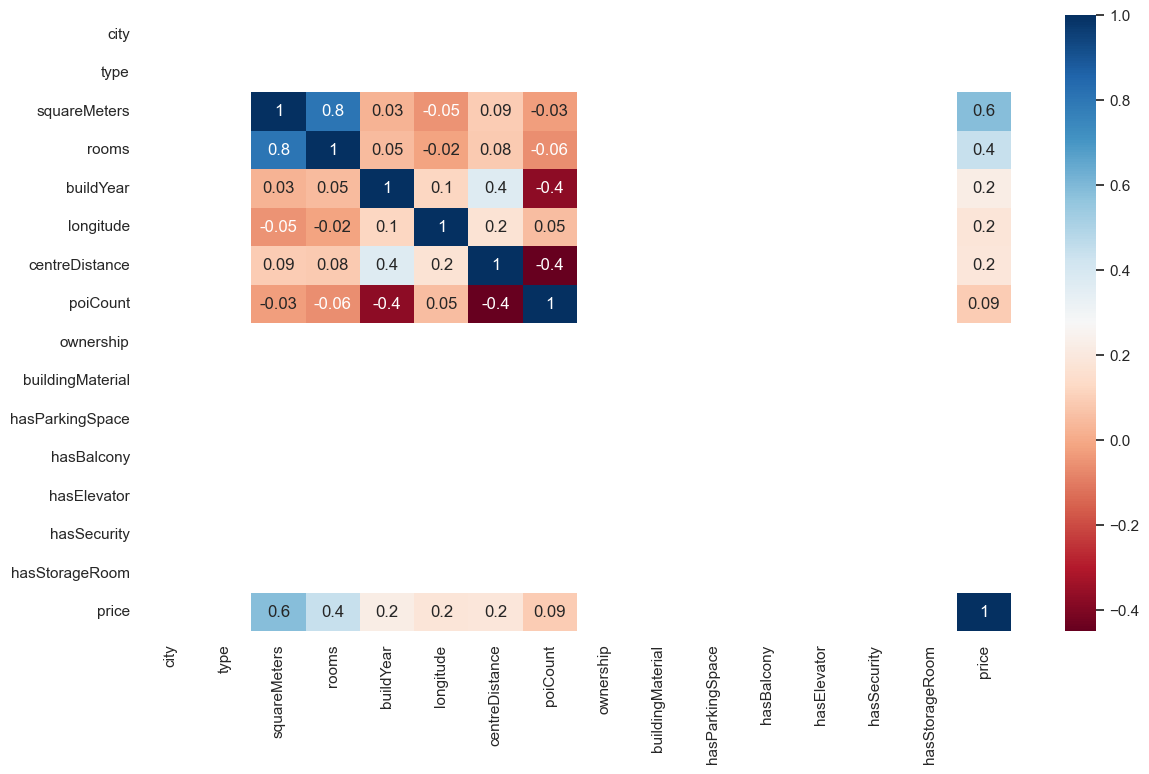

In [61]:
my_correlation_analysis(full_df)

## Hyperparameter modeling and optimization

### Using Random Forest Classifier to Check the Most Important Features

In [62]:
X = full_df.loc[:, full_df.columns != 'price']
y = full_df['price'].values

In [63]:
#clf = RandomForestClassifier(n_estimators=10, random_state=0, max_depth=9, n_jobs=-1)
clf = RandomForestClassifier(n_estimators=10, max_depth=20)

clf.fit(X, y)

RandomForestClassifier(max_depth=20, n_estimators=10)

In [64]:
feature_scores = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)

feature_scores

squareMeters        0.226687
longitude           0.219328
centreDistance      0.199664
buildYear           0.165468
poiCount            0.157043
rooms               0.031810
city                0.000000
type                0.000000
ownership           0.000000
buildingMaterial    0.000000
hasParkingSpace     0.000000
hasBalcony          0.000000
hasElevator         0.000000
hasSecurity         0.000000
hasStorageRoom      0.000000
dtype: float64

<BarContainer object of 15 artists>

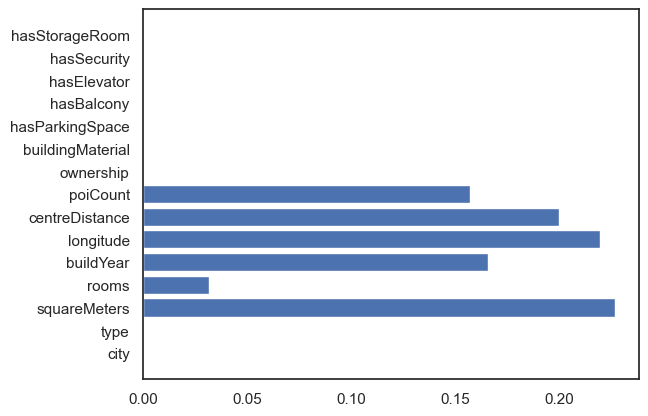

In [65]:
plt.barh(X.columns, clf.feature_importances_)

## Klasyfikacja

### Regresja logistyczna

In [66]:
X_train, y_train = full_df.drop(columns=["price"]), full_df["price"]
X_test, y_test = df_test_OK.drop(columns=["price"]), df_test_OK["price"]

In [67]:
model = linear_model.LinearRegression()
model_LR1 = model.fit(X1_train_scaled, y_train)
prediction = model.predict(X1_test_scaled)
r2_calc = r2_score(y_test, prediction)
print(f'For Linear Regression the R2 score is: ', r2_calc)

For Linear Regression the R2 score is:  1.0


In [68]:

#for work_fit_intercept in [True , False]:
#    model = linear_model.LinearRegression(fit_intercept = work_fit_intercept)
#    model_LR1 = model.fit(X1_train_scaled, y_train)
#    prediction = model.predict(X1_test_scaled)
#    r2_calc = r2_score(y_test, prediction)
#    print(f'For fit_intercept = {work_fit_intercept} the R2 score is: ', r2_calc)

Coefficient of determination also called as R2 score is used to evaluate the performance of a linear regression model. For fit_intercept = True the value is correct, but fit_intercept = False the value is not in the range 0-1. Data is not centeredIt can be referred that 57% of the changeability of the dependent output attribute can be explained by the model while the remaining 43 % of the variability is still unaccounted for.

### Random Forest

In [69]:
from sklearn.ensemble import RandomForestRegressor

In [70]:
X = full_df.loc[:, full_df.columns != 'price']
y = full_df['price'].values

In [71]:
model = RandomForestRegressor()
model.fit(X1_train_scaled, y_train)
prediction = model.predict(X1_test_scaled)
RFR_calc = r2_score(y_test, prediction)
print(f'For Random Forest Regressor the R2 score is: ', RFR_calc)

For Random Forest Regressor the R2 score is:  0.9260567748862215


In [72]:
#from sklearn.ensemble import RandomForestRegressor

## Przykładowe dane
#X_train = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
#y_train = [10, 20, 30]
#
## Inicjalizacja i dopasowanie modelu RandomForestRegressor
#model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
#model.fit(X_train, y_train)
#

#!!!!!!!!!!od tego sprawdzić
# Odczytanie parametrów modelu
parametry = model.get_params()

# Wydruk parametrów
print("Parametry modelu:")
for parametr, wartosc in parametry.items():
    print(f"{parametr}: {wartosc}")


Parametry modelu:
bootstrap: True
ccp_alpha: 0.0
criterion: squared_error
max_depth: None
max_features: 1.0
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
n_estimators: 100
n_jobs: None
oob_score: False
random_state: None
verbose: 0
warm_start: False


Finding the best n_estimator

In [85]:
# edytować!!!!!!!!!!!!!!!!!!!!
max_depths = [1,5,10,20,50,100,200,500,1000,2000, 3000, 4000]
RFR_R2_score = []
for max_depth in max_depths:
    model = RandomForestRegressor(n_estimators = 100, max_depth=max_depth)
    model.fit(X1_train_scaled, y_train)
    prediction = model.predict(X1_test_scaled)
    RFR_calc = r2_score(y_test , prediction)
    RFR_R2_score.append(RFR_calc)
    print(f'For {max_depth} max_depth the R2 score is: ', RFR_calc)
    


For 1 max_depth the R2 score is:  0.5073597488454378
For 5 max_depth the R2 score is:  0.9153468798176435
For 10 max_depth the R2 score is:  0.925868278926995
For 20 max_depth the R2 score is:  0.9259248533787497
For 50 max_depth the R2 score is:  0.9260311407863447
For 100 max_depth the R2 score is:  0.9259889888156689
For 200 max_depth the R2 score is:  0.9260219606350928
For 500 max_depth the R2 score is:  0.9258126003592743
For 1000 max_depth the R2 score is:  0.9259338300933799
For 2000 max_depth the R2 score is:  0.9259318556550609
For 3000 max_depth the R2 score is:  0.9258810862463326
For 4000 max_depth the R2 score is:  0.9259627449466049


In [73]:
# edytować!!!!!!!!!!!!!!!!!!!!
N_estimators = [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,200,500]
RFR_R2_score = []
for n_estimator in N_estimators:
    model = RandomForestRegressor(n_estimators = n_estimator, max_depth=7)
    model.fit(X1_train_scaled, y_train)
    prediction = model.predict(X1_test_scaled)
    RFR_calc = r2_score(y_test , prediction)
    RFR_R2_score.append(RFR_calc)
    print(f'For {n_estimator} n_estimator the R2 score is: ', RFR_calc)
    


For 1 n_estimator the R2 score is:  0.923610117829555
For 2 n_estimator the R2 score is:  0.9237679347995483
For 3 n_estimator the R2 score is:  0.9237798048528023
For 4 n_estimator the R2 score is:  0.9237855478104782
For 5 n_estimator the R2 score is:  0.9237807812680986
For 6 n_estimator the R2 score is:  0.9237078277029791
For 7 n_estimator the R2 score is:  0.9236942836942078
For 8 n_estimator the R2 score is:  0.923749221994278
For 9 n_estimator the R2 score is:  0.923807169030922
For 10 n_estimator the R2 score is:  0.923788946081305
For 20 n_estimator the R2 score is:  0.9237382100902197
For 30 n_estimator the R2 score is:  0.9237149626415475
For 40 n_estimator the R2 score is:  0.9237303754159829
For 50 n_estimator the R2 score is:  0.9237693958919835
For 60 n_estimator the R2 score is:  0.9237688539360868
For 70 n_estimator the R2 score is:  0.9237635297125428
For 80 n_estimator the R2 score is:  0.9237803866997992
For 90 n_estimator the R2 score is:  0.9237430352366699
For 1

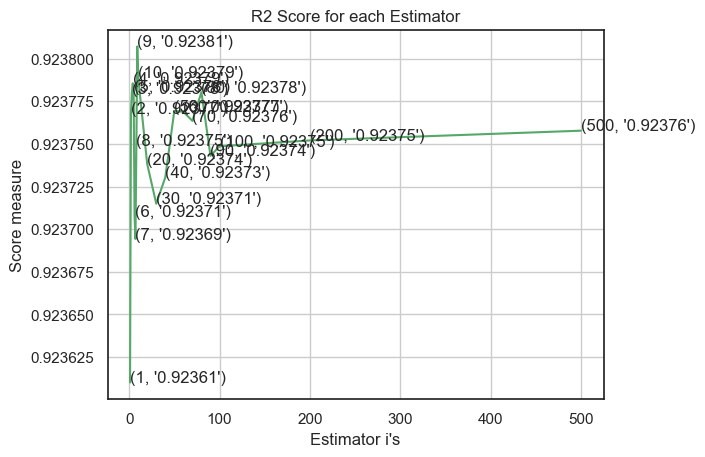

In [74]:
# edytować!!!!!!!!!!!!!!!!!!!!
fig, ax = plt.subplots()
ax.plot(N_estimators, RFR_R2_score,c='g')
for i, txt in enumerate(np.round(RFR_R2_score,5)):
    ax.annotate((N_estimators[i],str(txt)), (N_estimators[i],RFR_R2_score[i]))
plt.grid()
plt.title("R2 Score for each Estimator")
plt.xlabel("Estimator i's")
plt.ylabel("Score measure")
plt.show()

In [75]:
# edytować!!!!!!!!!!!!!!!!!!!!
from sklearn.model_selection import GridSearchCV

In [76]:
# edytować!!!!!!!!!!!!!!!!!!!!
param_grid = { 
    'n_estimators': [25, 50, 100, 150, 200], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 7, 11], 
    'max_leaf_nodes': [3, 7, 11], 
}


grid_search = GridSearchCV(RandomForestRegressor(), 
                           param_grid=param_grid) 
grid_search.fit(X1_train_scaled, y_train) 
print(grid_search.best_estimator_) 


RandomForestRegressor(max_depth=7, max_features=None, max_leaf_nodes=11,
                      n_estimators=50)


In [77]:
model = RandomForestRegressor(max_depth=11, max_features=None, max_leaf_nodes=11,
                      n_estimators=50)
model.fit(X1_train_scaled, y_train)
prediction = model.predict(X1_test_scaled)
RFR_calc = r2_score(y_test , prediction)
print(f'For RandomForestRegressor(max_depth=7, max_features=None, max_leaf_nodes=11, n_estimators=200) the R2 score is: ', RFR_calc)

For RandomForestRegressor(max_depth=7, max_features=None, max_leaf_nodes=11, n_estimators=200) the R2 score is:  0.8718720771042161


### XGBRegressor

In [78]:
#model = XGBRegressor(n_estimators=200, max_depth=6, eval_metric=["auc", "error", "error@0.6"])
model = XGBRegressor()

In [79]:
model.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [80]:
prediction = model.predict(X_test)

In [81]:
print(r2_score(y_test, prediction))

0.7548963897966763


In [82]:
print(mean_squared_error(y_test, prediction))

print(mean_absolute_error(y_test, prediction))

45759520235.75904
114750.29028961658


# Conclusion

- Selected features did not always provide better rating metrics
- Among all the XGBoost algorithms, Regressor performed better.
- More accurate hyperparameters may yield better results.